In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
df=pd.read_csv('/Users/jeong-yula/Downloads/open/train.csv')
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [2]:
numeric_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적']

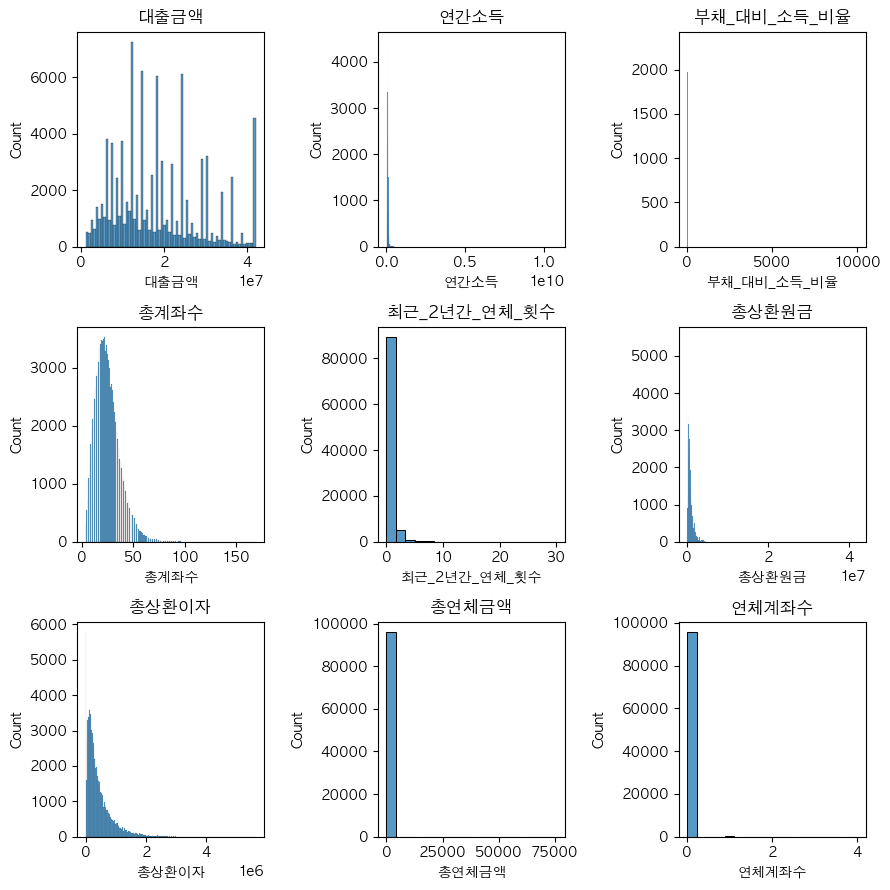

In [3]:
def get_3_hist(data:pd.DataFrame, columns:list):
    
    plt.figure(figsize=(9, 9))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(3, 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

get_3_hist(df, numeric_col)

근로기간 label encoding

In [44]:
def year_encoder(x):
    output = x.replace('years', '')
    output = output.replace('year', '')
    output = output.replace('+', '')
    output = output.replace('<', '')
    output = output.replace('Unknown', '-1').strip()
    output = int(output)

    return output

In [45]:
df['근로기간'] = df['근로기간'].apply(year_encoder)

주택소유상태


In [46]:
drop_index = df[df['주택소유상태'] == 'ANY'].index

df = df.drop(drop_index)

In [48]:
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,4
1,TRAIN_00001,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,5
2,TRAIN_00002,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,6
3,TRAIN_00003,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,4
4,TRAIN_00004,18000000,60 months,-1,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,5


In [8]:
df['대출등급'].unique()

array(['C', 'B', 'A', 'D', 'F', 'G', 'E'], dtype=object)

대출등급 인코딩

In [47]:
def class_encoder(x):
    if x=='A':
        return 6
    elif x=='B':
        return 5
    elif x=='C':
        return 4
    elif x=='D':
        return 3
    elif x=='E':
        return 2
    elif x=='F':
        return 1
    else:
        return 0

df['대출등급']=df['대출등급'].apply(class_encoder)


인코딩

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le= LabelEncoder()
oe=OneHotEncoder()

In [50]:
oe.fit(df[['주택소유상태']])

OneHotEncoder()

In [51]:
oe.transform(df[['주택소유상태']])

<96293x3 sparse matrix of type '<class 'numpy.float64'>'
	with 96293 stored elements in Compressed Sparse Row format>

In [52]:
house_csr=oe.transform(df[['주택소유상태']])
house_csr_df=pd.DataFrame(house_csr.toarray(), columns=oe.get_feature_names_out())
house_csr_df.head()

,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [53]:
df=pd.concat([df,house_csr_df],axis=1)

대출기간 인코딩

In [54]:
oe1=OneHotEncoder()

In [55]:
oe1.fit(df[['대출기간']])


OneHotEncoder()

In [56]:
oe1.transform(df[['대출기간']])

<96294x3 sparse matrix of type '<class 'numpy.float64'>'
	with 96294 stored elements in Compressed Sparse Row format>

In [57]:
period_csr=oe1.transform(df[['대출기간']])
period_csr_df=pd.DataFrame(period_csr.toarray(), columns=oe1.get_feature_names_out())
period_csr_df.head()

,대출기간_ 36 months,대출기간_ 60 months,대출기간_nan
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [19]:
df=pd.concat([df,period_csr_df],axis=1)

In [20]:
# df.loc[df['ID']=='TRAIN_96293']

In [21]:
# df.loc[df['ID']=='TRAIN_96293'] --주택 any

대출목적 인코딩

In [22]:
oe2=OneHotEncoder()

In [23]:
oe2.fit(df[['대출목적']])


OneHotEncoder()

In [24]:
oe2.transform(df[['대출목적']])

<96294x13 sparse matrix of type '<class 'numpy.float64'>'
	with 96294 stored elements in Compressed Sparse Row format>

In [25]:
purpose_csr=oe2.transform(df[['대출목적']])
purpose_csr_df=pd.DataFrame(purpose_csr.toarray(), columns=oe2.get_feature_names_out())
purpose_csr_df.head()

,대출목적_기타,대출목적_부채 통합,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가,대출목적_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
df=pd.concat([df,purpose_csr_df],axis=1)

이상치 제거 -4분위수

In [27]:
IQR_columns=['부채_대비_소득_비율','연간소득','총상환원금','총상환이자','총계좌수']

for col in IQR_columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    
    cond=(df[col]<=upper)&(df[col]>=lower)

    df=df[cond]



스케일링

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sd_sc=StandardScaler()
mm_sc=MinMaxScaler()


In [29]:
mm_sc.fit(df[['대출금액','총상환원금','총상환이자']])
df[['대출금액','총상환원금','총상환이자']]=mm_sc.transform(df[['대출금액','총상환원금','총상환이자']])

In [30]:
sd_sc.fit(df[['총연체금액','최근_2년간_연체_횟수','연체계좌수']])
df[['총연체금액','최근_2년간_연체_횟수','연체계좌수']]=sd_sc.transform(df[['총연체금액','최근_2년간_연체_횟수','연체계좌수']])

In [73]:
df.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT
0,12480000.0,36 months,6.0,RENT,72000000.0,18.90,15.0,부채 통합,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0
1,14400000.0,60 months,10.0,MORTGAGE,130800000.0,22.33,21.0,주택 개선,0.0,373572.0,234060.0,0.0,0.0,5.0,1.0,0.0,0.0
2,12000000.0,36 months,5.0,MORTGAGE,96000000.0,8.60,14.0,부채 통합,0.0,928644.0,151944.0,0.0,0.0,6.0,1.0,0.0,0.0
3,14400000.0,36 months,8.0,MORTGAGE,132000000.0,15.09,15.0,부채 통합,0.0,325824.0,153108.0,0.0,0.0,4.0,1.0,0.0,0.0
4,18000000.0,60 months,-1.0,RENT,71736000.0,25.39,19.0,주요 구매,0.0,228540.0,148956.0,0.0,0.0,5.0,0.0,0.0,1.0


In [59]:
df1=df.copy()

In [60]:
df1=df1.drop(['ID'],axis=1)

In [61]:
df1=df1.drop(['대출기간'],axis=1)

In [62]:
df1=df1.drop(['주택소유상태'],axis=1)

In [63]:
df1=df1.drop(['대출목적'],axis=1)

In [64]:
pd.options.display.max_columns = 30


In [69]:
df1.describe()

,대출금액,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT
count,9.629300e+04,96293.000000,9.629300e+04,96293.000000,96293.000000,96293.000000,9.629300e+04,9.629300e+04,96293.000000,96293.000000,96293.000000,96293.000000,96293.000000,96293.000000
mean,1.830376e+07,5.679613,9.392673e+07,19.379607,25.304882,0.345685,8.225120e+05,4.282327e+05,54.381149,0.005805,4.277871,0.497793,0.110641,0.391565
std,1.032887e+07,3.864701,9.956923e+07,33.569733,12.088616,0.919123,1.027747e+06,4.402112e+05,1414.776554,0.079967,1.270967,0.499998,0.313689,0.488103
min,1.200000e+06,-1.000000,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.020000e+07,2.000000,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
50%,1.680000e+07,6.000000,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870160e+05,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
75%,2.400000e+07,10.000000,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702280e+05,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000
max,4.200000e+07,10.000000,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000,6.000000,1.000000,1.000000,1.000000


In [ ]:
df=df.drop(['ID'],axis=1)

In [76]:
df=df.drop([28730],axis=0)


In [77]:
df['대출등급'].isna

<bound method Series.isna of 0        4.0
1        5.0
2        6.0
3        4.0
4        5.0
        ... 
96289    4.0
96290    2.0
96291    6.0
96292    3.0
96293    4.0
Name: 대출등급, Length: 96293, dtype: float64>

In [ ]:
df.

In [78]:
X = df1
y = df['대출등급']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

numeric_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적']

ValueError: Found input variables with inconsistent numbers of samples: [96294, 96293]

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc=DecisionTreeClassifier(max_depth=3,random_state=20)
dtc.fit(X_train,y_train)

ValueError: could not convert string to float: 'C'